<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/%EC%8B%A0%ED%98%B8%EB%B0%8F%EC%8B%9C%EC%8A%A4%ED%85%9C_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 내용
이번 숙제는 파이썬을 이용해서 직접 생성한 wav파일들을 불러오고,

적절한 신호처리 과정을 통해 길이를 맞추어 준 후,

세 신호에 대한 가중치를 조절해가며 신호를 더해 생성한 새로운 오디오파일을 파일로 저장해보는 것입니다.

 

실습과제는 아래의 코드를 참고하여 진행합니다.

Lab03 python code

 

새로 생성한 오디오 파일은 반드시 wsum.wav 라는 파일이름으로 저장하도록 합니다.

 

이번 과제는 아래 두 개의 파일을 제출하도록 합니다.

1. wsum.wav 

2. hw03.ipynb (or hw03.py)

: 파이썬코드는 파일을 불러오고, 신호처리를 진행하고, wsum.wav를 저장하는 코드 및 각 과정에 대한 주석(설명)을 포함해야 합니다.

코드

In [112]:
#google colab <-> drive mount 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
#import moduel config 
import numpy as np #array 객체 를 이용하기 위해 가지고옴 
from scipy.io import wavfile #wavfile을 다루기 위한 패키지에서 wavfile 모듈을 가지고옴
import matplotlib.pyplot as plt #그래프를 확인하기 위해 매트플랏라이브러리의 pyplot 모듈가지고옴
from IPython.display import Audio as audio #audio 소리 재생을 위한 모듈 
import os, glob #시스템 및 경로 설정을 위해 가지고옴

In [114]:
#녹음한 3가지 wav 파일 불러와서, sample rate 및 sequence len(신호 길이)를 확인하고 신호의 파형을 확인

##wavfile.read(file Path) : 파일 경로 읽어오기
PATH = '/content/drive/MyDrive/Colab Notebooks/3-1_BME신호및시스템/HW3/data/'
SAVE_PATH= os.path.join(PATH,'wsum.wav') #파일 저장할 경로 만들어놓기 
me_wav = wavfile.read(PATH+"me.wav") #me.wav 파일 읽어오기 -> 튜플형식으로 가지고옴
music_wav = wavfile.read(PATH+"music.wav") #music.wav 파일 읽어오기 -> 튜플형식으로 가지고옴
nature_wav = wavfile.read(PATH+"nature.wav") #nature.wav 파일 읽어오기 -> 튜플형식으로 가지고옴

#wav 구조 확인하기
print(f"nature wav  : {(nature_wav)}")
print(f"nature wav type : {type(nature_wav)}") #-> tuple로 구성됨 array가 섞여져있음
print(f"nature wav ndim : {(len(nature_wav))}") #-> 2개의 요소가 존재 { 0 : sampling rate, 1 : sampling data num}
print(f"wav[0] : {nature_wav[0]}") #->Sampling Rate
print(f"wav[1] : {nature_wav[1]}") #->Sampling data num
print(f"wav[1] type : {type(nature_wav[1])}") #-> idx = 1에는 array로 표현되어있음
print(f"wav[1] shape : {nature_wav[1].shape}") # -> sample 개수가 425984개 존재
print()

#sample rate는 동일하게 맞춰줌 (이전에 데이터 저장할떄 48000로 맞춰줌)
print("Sample rate check")
print(f"me wav sample rate : {(me_wav[0])}") 
print(f"music wav sample rate : {(music_wav[0])}") 
print(f"nature wav sample rate : {(nature_wav[0])}") #-> 425983
print()

# sample 개수 (길이) 가 다름! 따라서 맞춰줘야함
print("Sample len check")
print(f"me wav sample len : {len(me_wav[1])}") #-> 397312
print(f"music wav sample len : {len(music_wav[1])}") #-> 454656
print(f"nature wav sample len : {len(nature_wav[1])}") #-> 425983
#-> sample 개수를 맞춰주는 작업을 마지막에 할 예정


nature wav  : (48000, array([   0,    0,   -1, ..., -841, -770, -666], dtype=int16))
nature wav type : <class 'tuple'>
nature wav ndim : 2
wav[0] : 48000
wav[1] : [   0    0   -1 ... -841 -770 -666]
wav[1] type : <class 'numpy.ndarray'>
wav[1] shape : (425984,)

Sample rate check
me wav sample rate : 48000
music wav sample rate : 48000
nature wav sample rate : 48000

Sample len check
me wav sample len : 397312
music wav sample len : 454656
nature wav sample len : 425984


In [115]:
# wav파일에 가끔 idx 1번에 샘플 데이터에 2개의 요소가 있는 경우가 존재하므로 채널을 제거해준다.
print(me_wav[1])
print(music_wav[1])
print(nature_wav[1])
print()

#-> 내꺼는 없다. 하지만, 샘플 수만 가져와야하므로, 함수를 하나 정의해서 다른 파일에 대해서도 할 수 있게 함수 만들어 놓자.
print(f"처리 전 :{me_wav}") #데이터가 어떻게 변하는지 확인해보자

def sqz(wav):
  #if 에서 error 시 위의 cell 재실행 후 진행하기
  if wav[1].shape[-1] == 2: #wav파일의 idx 1번에 있는 샘플링 데이터가 2차원 튜플인경우 첫번쨰 샘플 수만 저장하게 바꿔주기
    wav = wav[1][:,0] #-> 첫번쨰 꺼만 wav 변수에 다시재지정
  else:
    wav = wav[1] #->  wav 내에 있는 샘플 데이터리스트만 가지고 오기
  return wav #리턴

#함수를 이용해 샘플수만 가지고오기
me_wav = sqz(me_wav) 
music_wav = sqz(music_wav)
nature_wav = sqz(nature_wav)
print(f"처리 후 :{me_wav}")
print()

print(me_wav.shape) 
print(music_wav.shape) 
print(nature_wav.shape) 


[ 0  0  0 ... 10  9  8]
[   0    0    0 ... 1345 1325 1300]
[   0    0   -1 ... -841 -770 -666]

처리 전 :(48000, array([ 0,  0,  0, ..., 10,  9,  8], dtype=int16))
처리 후 :[ 0  0  0 ... 10  9  8]

(397312,)
(454656,)
(425984,)


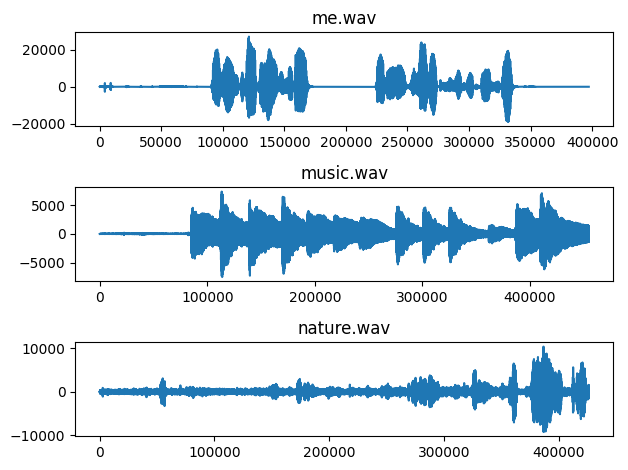

In [116]:
#plot해서 확인해보기

plt.subplot(311)#plt.subplot(row num, col num, 순서) : 여러그래프를 한번에 보여주기 위한 레이아웃 명령어
plt.plot(me_wav) #그래프로 확인하기
plt.title('me.wav') #그래프 제목적기
plt.subplot(312)  # 두번쨰 row에 그래프넣기
plt.plot(music_wav)#그래프로 확인하기
plt.title('music.wav')#그래프 제목적기
plt.subplot(313) # 세번쨰 row에 그래프넣기
plt.plot(nature_wav)#그래프로 확인하기
plt.title('nature.wav') #그래프 제목적기
plt.tight_layout() #제목이 겹쳐서 안보이는 것을 보완
plt.show() #여러 그래프 한번에 보여주기


orig signal : [ 0  0  0 ... 10  9  8]
reveral time signal : [ 8  9 10 ...  0  0  0]


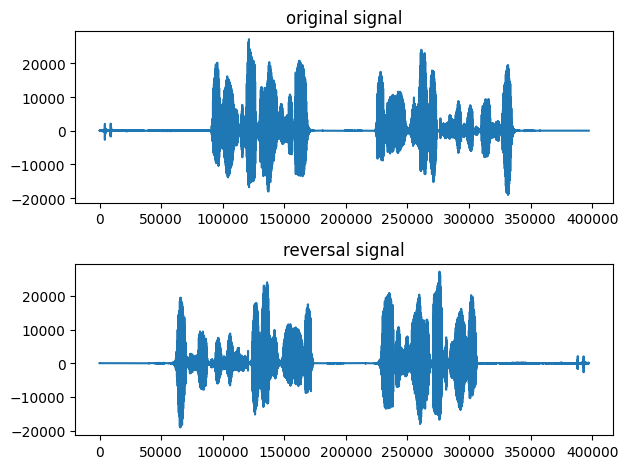

In [117]:
# 시간축에 대해 뒤집힌 신호를 생성하고 재생된 소리 확인하기 
orig_sig = me_wav 
transformed_sig = orig_sig[::-1] #-> 시간축을 반대로 슬라이싱해서 제일 끝에 있는 데이터가 맨앞으로오게
print(f"orig signal : {orig_sig}")
print(f"reveral time signal : {transformed_sig}")

plt.subplot(211) #첫번쨰 row에 그래프넣기
plt.plot(orig_sig) #기존 신호 를 보여줌
plt.title("original signal") #제목 붙이기
plt.subplot(212) #두번쨰 row에 변환된 신호 넣기
plt.plot(transformed_sig) #시간축이 반대인 신호를 넣어줌
plt.title('reversal signal') # 제목 붙이기
plt.tight_layout() #제목 겹침 방지 명령어
plt.show() #한번에 보여주기 

#음성으로 확인하기 시간이 reversal된 소리를 알 수 있음
audio(transformed_sig, rate = 48000) #sample rate = 48000 

orig signal : [ 0  0  0 ... 10  9  8]
Compressed signal : [ 0  0  0 ...  9 10  9]


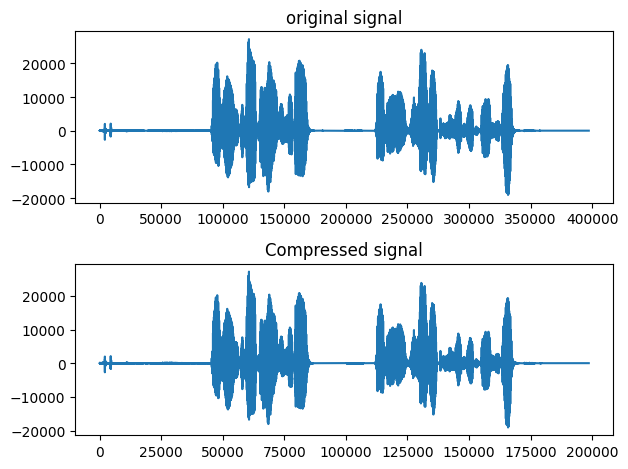

In [118]:
#Compress 된 신호[압축]를 생성하고 재생되는 소리 확인 
# 시간축에 대해 뒤집힌 신호를 생성하고 재생된 소리 확인하기 
orig_sig = me_wav
transformed_sig = orig_sig[::2] #-> sample data를 1/2만 가지고옴 -> sample 수가 1/2 되면서 시간도 짧아짐
print(f"orig signal : {orig_sig}")
print(f"Compressed signal : {transformed_sig}")

plt.subplot(211)
plt.plot(orig_sig)
plt.title("original signal")
plt.subplot(212)
plt.plot(transformed_sig)
plt.title('Compressed signal')
plt.tight_layout()
plt.show()


#음성으로 확인하기 시간이 압축된 소리를 알 수 있음
audio(transformed_sig, rate = 48000) #sample rate = 48000

multi array : [-5  1 -2 ... -4 -5 -4]
origin sig : [ 0  0  0 ... 10  9  8]
trans sig : [  0   0   0 ... -40 -45 -32]


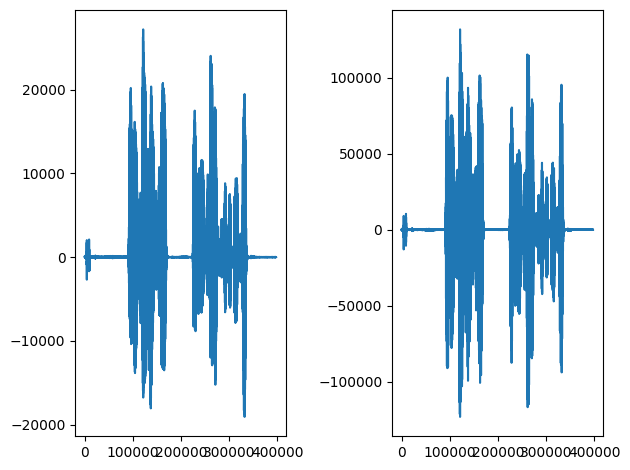

In [119]:
#랜덤한 숫자가 곱해진 신호를 만들어, 재생되는 소리 확인
#np.random.randint( range(5, 5), array_shape) : 랜덤으로 지정한 범위 내의 정수를 요소에 넣어 shape 모양의 array로 만들어줌
orig_sig = me_wav
multi_array = np.random.randint(-5, 6, orig_sig.shape)
transformed_sig = orig_sig * multi_array
#-> 음수로 지정하는 이유? 어차피 0까지 있는건 아닐까?
print(f"multi array : {multi_array}")
print(f"origin sig : {orig_sig}")
print(f"trans sig : {transformed_sig}")
# *의 의미 : multiplication -> 진폭이 바뀐다. 
plt.subplot(121)
plt.plot(orig_sig)
plt.subplot(122)
plt.plot(transformed_sig) #진폭이 최대 5배에서 -5배로 줄어드는 것을 확인할 수 있다. 
plt.tight_layout()
plt.show()

audio(transformed_sig,rate=48000) 



sample len : (397312,) , (454656,), (425984,)


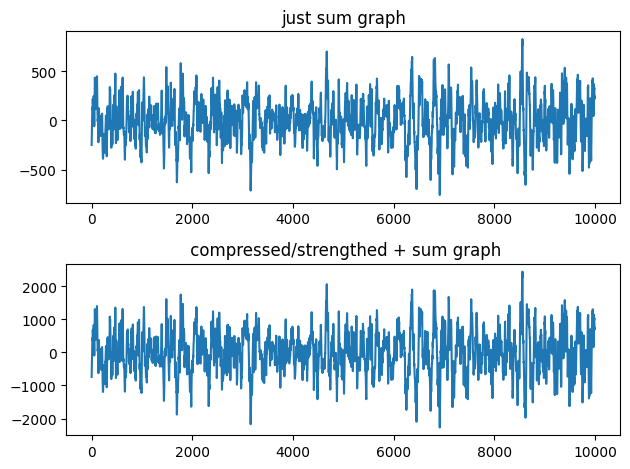

save_wav sample num : (10000,)


In [120]:
#적절한 변환을 통해 세 개의 신호를 동일한 길이로 만들고 linear combination을 통해 새로운 신호를 생성하기
# 가장 마음에 드는 조합의 신호를 만들어보자.

#특정 범위의 길이를 샘플링 하기 위해선 같은 크기(길이)의 리스트를 가지고 있으면 됨 
print(f"sample len : {me_wav.shape} , {music_wav.shape}, {nature_wav.shape}")


#특정 범위를 10000으로 맞춰서 특정 구간끼리 더해서 새로운 음성 신호를 만듬
save_wav = 1.0 * me_wav[10000:20000] + 2. * music_wav[20000:30000] + 3. * nature_wav[30000:40000]
sum_wav = me_wav[10000:20000] + music_wav[20000:30000] + nature_wav[30000:40000] #strength이런거 안한거랑 확인해보기

plt.subplot(211)
plt.plot(sum_wav)
plt.title("just sum graph")
plt.subplot(212)
plt.plot(save_wav)
plt.title(" compressed/strengthed + sum graph")
plt.tight_layout()
plt.show() #확인해보기

print(f"save_wav sample num : {save_wav.shape}") #저장할 파일 save_wav의 sample 수 확인

# 10000의 샘플에 3개의 compressed 되거나 strength된 음성 신호가 합쳐진 소리를 재생 

audio(save_wav, rate = 48000)  #소리로 확인하기

In [123]:
#save config & save
#wavfile.write(SAVE PATH+FILE NAME, sample rate, saved var(꼭 array object여야함))
#SAVE_PATH는 초기에 설정해줌
print(type(save_wav))
wavfile.write(SAVE_PATH, 48000, np.int16(save_wav)) 

<class 'numpy.ndarray'>
